In [61]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
DATA DESCRIPTION

file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']

In [ ]:
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [18]:
q1= pd.read_csv("D:\Jupyter\quarter-1.csv")
q2 = pd.read_csv("D:\Jupyter\quarter-2.csv")
q3 = pd.read_csv("D:\Jupyter\quarter-3.csv")

items = pd.read_csv("D:\Jupyter\items_session20.csv")

## Q:1-5
#### 1. You are given three quater files, your job is to append these three files and make a single dataframe.
#### 2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
#### 3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
#### 4. Find out items which has made most revenue in each quarter.
#### 5. Find out avg order price of each quarter.

#### Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.

In [19]:
print(q1.shape)
print(q2.shape)
print(q3.shape)
print(q1.shape[0]+q2.shape[0])
print(q1.head(1))
print(q2.head(1))
print(q3.head(1))

(2275, 5)
(2347, 5)
(0, 5)
4622
   order_id  quantity  item_id  choice_description_id item_price
0         1         1        1                      1     $3.39 
   order_id  quantity  item_id  choice_description_id item_price
0         1         1        0                      0     $2.39 
Empty DataFrame
Columns: [order_id, quantity, item_id, choice_description_id, item_price]
Index: []


In [20]:
#You are given three quater files, your job is to append these three files and make a single dataframe
#Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
temp_df = pd.concat([q1,q2,q3],keys=["Q-1","Q-2","Q-3"])
temp_df

order_id quantity item_id choice_description_id item_price
Q-1 0           1        1       1                     1     $3.39 
    1           1        1       2                     2     $3.39 
    2           2        2       4                     3    $16.98 
    3           4        1       7                     6     $9.25 
    4           6        1       9                     8     $8.75 
...           ...      ...     ...                   ...        ...
Q-2 2342     1829        1      23                    92    $11.25 
    2343     1830        1      23                  1043    $11.25 
    2344     1832        1      10                   116     $8.75 
    2345     1832        1       8                     0     $4.45 
    2346     1834        1      20                   515    $11.25 

[4622 rows x 5 columns]

In [41]:
#Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
temp_df.reset_index().merge(items,on="item_id").groupby(["level_0","item_name"])["quantity"].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset=["level_0"],keep="first")

,level_0,item_name,quantity
0,Q-2,Chicken Bowl,394
1,Q-1,Chicken Bowl,367


In [62]:
#Find out items which has made most revenue in each quarter.
df = temp_df.reset_index().merge(items,on="item_id")
df["item_price"] = df["item_price"].str.replace("$","").astype(float)
df["quantity"] = df["quantity"].astype(np.int16)
df["Total Price"] =  df["item_price"] * df["quantity"]

In [63]:
df.groupby(["level_0","item_name"])["Total Price"].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset=["level_0"],keep="first")

,level_0,item_name,Total Price
0,Q-2,Chicken Bowl,4192.25
1,Q-1,Chicken Bowl,3852.38


In [80]:
#Find out avg order price of each quarter.
df.groupby(["level_0","order_id"],as_index=False)["Total Price"].sum().groupby("level_0",as_index=False)["Total Price"].mean()

,level_0,Total Price
0,Q-1,13.809488
1,Q-2,13.279828


In [96]:
total_earn = df.groupby("level_0")["Total Price"].sum()
total_order = df.groupby("level_0")["order_id"].nunique()
total_earn/total_order

level_0
Q-1    13.809488
Q-2    13.279828
dtype: float64

### Q-6 From the IPL wala dataset you have to find the Purple cap holder each season.
#### Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.

#### Bowler's Economy = runs-conceded per six balls

In [138]:
matches = pd.read_csv("D:\Jupyter\ipl-matches.csv")
matches.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [139]:
balls = pd.read_csv("D:\Jupyter\IPL_Ball_by_Ball_2008_2022.csv")
balls.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [168]:
temp_df = balls.merge(matches[["ID","Season"]],on="ID")
temp_df.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022


In [169]:
valid_wicket = ['caught', 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket']
valid_run = ["legbyes","byes"]
legal_ball = ['wides', 'noballs']
temp_df["ISBowlerWicket"]=temp_df["kind"].isin(valid_wicket)
temp_df["BowlerRun"]=(~temp_df["extra_type"].isin(valid_run))*temp_df["total_run"]
temp_df["IsLegalBall"]=(~temp_df["extra_type"].isin(legal_ball))

In [170]:
pcapdf = temp_df.groupby(["Season","bowler"],as_index=False)[["ISBowlerWicket","BowlerRun","IsLegalBall"]].sum()

In [171]:
pcapdf["Economy"] = pcapdf["BowlerRun"]/pcapdf["IsLegalBall"] * 6

In [172]:
pcapdf.sort_values(["ISBowlerWicket","Economy"],ascending=[False,True]).drop_duplicates("Season",keep="first").sort_values("Season")

,Season,bowler,ISBowlerWicket,BowlerRun,IsLegalBall,Economy
84,2007/08,Sohail Tanvir,22,266,247,6.461538
174,2009,RP Singh,23,417,358,6.988827
284,2009/10,PP Ojha,21,429,353,7.291785
447,2011,SL Malinga,28,375,378,5.952381
537,2012,M Morkel,25,453,378,7.190476
629,2013,DJ Bravo,32,497,375,7.952000
779,2014,MM Sharma,23,452,323,8.396285
847,2015,DJ Bravo,26,426,314,8.140127
938,2016,B Kumar,23,490,396,7.424242
1048,2017,B Kumar,26,369,314,7.050955


### Q-7: Best bowler in death overs.
#### Note: Have taken most no of wickets in case of tie with least economy

###### Death Overs - [16-20]

In [173]:
temp_df.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,ISBowlerWicket,BowlerRun,IsLegalBall
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,False,0,True


In [174]:
temp_df["overs"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [177]:
death_overs = temp_df[temp_df["overs"] >= 15]

In [183]:
temp = death_overs.groupby("bowler")[["ISBowlerWicket","BowlerRun","IsLegalBall"]].sum().reset_index()
temp["Economy"] = temp["BowlerRun"] / temp["IsLegalBall"] *6
temp.sort_values(["ISBowlerWicket","Economy"],ascending=[False,True]).head()

,bowler,ISBowlerWicket,BowlerRun,IsLegalBall,Economy
91,DJ Bravo,115,2161,1385,9.361733
331,SL Malinga,108,1464,1117,7.863921
53,B Kumar,90,1752,1173,8.961637
148,JJ Bumrah,80,1614,1146,8.450262
339,SP Narine,67,1164,949,7.359326


### Q-8 Batsman record season wise
### Make a function which takes a input batsman_name and it returns a dataframe. Columns of the data frame are - ['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate'].

#### In result make Season column as index.

#### Avg - total_runs/ no of time got out. - player_out column will help.

#### StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help

#### Batsman Can score runs on No Balls.

#### Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [201]:
season_df = temp_df.drop(columns=["ISBowlerWicket","BowlerRun","IsLegalBall"],axis=1)
#season_df["batsman_out"] = (season_df["batter"] == season_df["player_out"]) | (season_df["non-striker"] == season_df["player_out"])
season_df["Balls faced"] =  season_df["extra_type"].apply(lambda x : 1 if x != "wides" else 0)
#season_df.groupby(["Season","batter"],as_index=False)[]

In [266]:
def bat_record_season(batsman):
    bdf = season_df[(season_df["batter"] == batsman)&(season_df["Balls faced"] == 1)].copy()
    df = bdf.groupby(["Season","ID"],as_index=False).agg({"batsman_run" : "sum", "Balls faced" : "count"}).groupby("Season").agg({"ID":"count","batsman_run" : "sum", "Balls faced" : "sum"})
    df.sort_index(inplace=True)
    df["IsBatsmanOut"] = season_df[season_df["player_out"] == batsman].groupby("Season")["player_out"].count()
    df["Avg"] = round((df["batsman_run"] / df["IsBatsmanOut"]),2)
    df["Highest_Score"] = bdf.groupby(["Season","ID"],as_index=False)["batsman_run"].sum().sort_values("batsman_run",ascending=False).drop(columns="ID",axis=1).drop_duplicates("Season",keep="first").sort_values("Season").set_index("Season")
    df["StrikeRate"] = (df["batsman_run"] / df["Balls faced"])*100
    df.rename(columns = {"ID":"Innings","batsman_run":"TotalRuns"},inplace=True)
    return df[['Innings', 'TotalRuns', 'Avg', 'Highest_Score','StrikeRate']]

In [267]:
bat_record_season("MS Dhoni")

,Innings,TotalRuns,Avg,Highest_Score,StrikeRate
Season,,,,,
2007/08,14,414,41.40,65,133.548387
2009,13,332,41.50,58,127.203065
2009/10,11,287,31.89,66,136.666667
2011,13,392,43.56,70,158.704453
2012,17,358,29.83,51,128.776978
2013,16,461,41.91,67,162.897527
2014,15,371,74.20,57,148.400000
2015,17,372,31.00,53,121.967213
2016,12,284,40.57,64,135.238095


### Q-9 Using both dataset, make a dataframe as described below
#### Data Frame columns-> ['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']

#### BattingFigure-> runs/balls 
#### BowlingFigure-> wicket/runs-conceded
#### DataFrame should have one record for each match.

#### Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN

#### PlayerOfThematch BattingFigure BowlingFigure
#### V Kohli          112/76         nan  

In [271]:
balls.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [284]:
matches.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [274]:
new_season_df = balls.merge(matches[["ID","Player_of_Match"]],on="ID")
new_season_df.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Player_of_Match
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya


In [300]:
batter_df = new_season_df[new_season_df["batter"] == new_season_df["Player_of_Match"]]
batter_df["IsBatsmanBall"] =  batter_df["extra_type"].apply(lambda x : 1 if x != "wides" else 0)
batter = batter_df.groupby(["ID","batter"],as_index=False)[["batsman_run","IsBatsmanBall"]].sum()
batter["BattingFigure"] = batter[["batsman_run","IsBatsmanBall"]].apply(lambda x : "/".join(map(str,x.values)),axis=1)
batter.rename(columns={"batter":"PlayerOfMatch"},inplace=True)
batter.head()

,ID,PlayerOfMatch,batsman_run,IsBatsmanBall,BattingFigure
0,335982,BB McCullum,158,73,158/73
1,335983,MEK Hussey,116,54,116/54
2,335985,MV Boucher,39,19,39/19
3,335986,DJ Hussey,38,43,38/43
4,335987,SR Watson,76,49,76/49


In [299]:
bowler_df = new_season_df[new_season_df["bowler"] == new_season_df["Player_of_Match"]]
bowler_df["IsBowlerWicket"] =  bowler_df["kind"].apply(lambda x : 1 if x in ['caught', 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket'] else 0)
bowler_df["BowlerRun"] = bowler_df["extra_type"].apply(lambda x : 0 if x in ["legbyes","byes"] else 1) * bowler_df["total_run"]
bowler = bowler_df.groupby(["ID","bowler"],as_index=False)[["IsBowlerWicket","BowlerRun"]].sum()
bowler["BowlingFigure"] = bowler[["IsBowlerWicket","BowlerRun"]].apply(lambda x : "/".join(map(str,x.values)),axis=1)
bowler.rename(columns={"bowler":"PlayerOfMatch"},inplace=True)
bowler.head()

,ID,PlayerOfMatch,IsBowlerWicket,BowlerRun,BowlingFigure
0,335984,MF Maharoof,2,11,2/11
1,335986,DJ Hussey,1,35,1/35
2,335987,SR Watson,0,39,0/39
3,335990,YK Pathan,2,20,2/20
4,335992,SR Watson,2,20,2/20


In [307]:
batter.merge(bowler,on=["ID","PlayerOfMatch"],how="outer").drop(columns=["batsman_run","IsBatsmanBall","IsBowlerWicket","BowlerRun"]).head()

,ID,PlayerOfMatch,BattingFigure,BowlingFigure
0,335982,BB McCullum,158/73,NaN
1,335983,MEK Hussey,116/54,NaN
2,335985,MV Boucher,39/19,NaN
3,335986,DJ Hussey,38/43,1/35
4,335987,SR Watson,76/49,0/39


In [308]:
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


In [311]:
sepal_all.head(1)

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm
0,0,1,5.1,3.5


In [312]:
petal_all.head(1)

,Unnamed: 0,Id,PetalLengthCm,PetalWidthCm
0,0,1,1.4,0.2


In [313]:
virginica.head(1)

,Unnamed: 0,Id,Species
0,100,101,Iris-virginica


In [314]:
versicolor.head(1)

,Unnamed: 0,Id,Species
0,50,51,Iris-versicolor


In [315]:
setosa.head(1)

,Unnamed: 0,Id,Species
0,0,1,Iris-setosa


### Q-9: Plot a bar chart of the average Sepal Length of Virginica and average Petal length of Setosa flower.

In [391]:
iris = pd.concat([virginica,versicolor,setosa])
iris = iris.merge(sepal_all,on="Id",how="left").merge(petal_all,on="Id",how="outer").sort_values("Id").drop(columns=["Unnamed: 0_x","Unnamed: 0_y","Unnamed: 0"])

                      kind  length
0  avg_sepal_len_virginica   6.588
1     avg_petal_len_setosa   1.464


<AxesSubplot: >

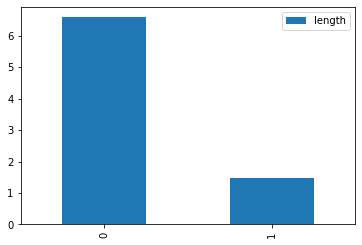

In [392]:
temp_df = iris.groupby("Species")[["SepalLengthCm","PetalLengthCm"]].mean()
avg_sepal_len_virginica = temp_df.loc["Iris-virginica","SepalLengthCm"]
avg_petal_len_setosa = temp_df.loc["Iris-setosa","PetalLengthCm"]
temp_df = pd.DataFrame({
    "kind": ["avg_sepal_len_virginica","avg_petal_len_setosa"],
    "length": [avg_sepal_len_virginica,avg_petal_len_setosa]

})
print(temp_df)
temp_df.plot(kind="bar")

In [352]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

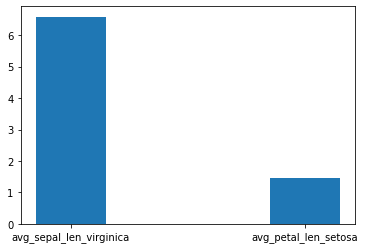

In [358]:
plt.bar(("avg_sepal_len_virginica","avg_petal_len_setosa"),(avg_sepal_len_virginica,avg_petal_len_setosa),width=0.3)

### Q-10: Create the complete dataset by using the below datasets:

In [406]:
iris1 = iris.sample(150,random_state=1,ignore_index=True)
iris1

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,107,Iris-virginica,4.9,2.5,4.5,1.7
1,116,Iris-virginica,6.4,3.2,5.3,2.3
2,20,Iris-setosa,5.1,3.8,1.5,0.3
3,98,Iris-versicolor,6.2,2.9,4.3,1.3
4,55,Iris-versicolor,6.5,2.8,4.6,1.5
...,...,...,...,...,...,...
145,52,Iris-versicolor,6.4,3.2,4.5,1.5
146,82,Iris-versicolor,5.5,2.4,3.7,1.0
147,66,Iris-versicolor,6.7,3.1,4.4,1.4
148,75,Iris-versicolor,6.4,2.9,4.3,1.3


### Q-11: Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
### First create a dataset with merging the required datasets
### After that, use groupby to create groups based on the "Species" column.
### Then find out which are asked in this question.
#### The output should be like this:

In [426]:
temp0 = iris1.groupby("Species").agg({
    "SepalWidthCm" : ["min","max"],
    "PetalWidthCm" : ["min","max"]
}).loc[["Iris-setosa","Iris-versicolor"]]
temp0

SepalWidthCm      PetalWidthCm     
                         min  max          min  max
Species                                            
Iris-setosa              2.3  4.4          0.1  0.6
Iris-versicolor          2.0  3.4          1.0  1.8

In [432]:
print("Minimum Sepal width of Setosa is",temp0.loc["Iris-setosa",("SepalWidthCm","min")])
print("Maximum Sepal width of Setosa is",temp0.loc["Iris-setosa",("SepalWidthCm","max")])
print("Minimum petal width of Setosa is",temp0.loc["Iris-setosa",("PetalWidthCm","min")])
print("Maximum petal width of Setosa is",temp0.loc["Iris-setosa",("PetalWidthCm","max")])
print("*"*70)
print("Minimum Sepal width of Versicolor is",temp0.loc["Iris-versicolor",("SepalWidthCm","min")])
print("Maximum Sepal width of Versicolor is",temp0.loc["Iris-versicolor",("SepalWidthCm","max")])
print("Minimum petal width of Versicolor is",temp0.loc["Iris-versicolor",("PetalWidthCm","min")])
print("Maximum petal width of Versicolor is",temp0.loc["Iris-versicolor",("PetalWidthCm","max")])

Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4
Minimum petal width of Setosa is 0.1
Maximum petal width of Setosa is 0.6
**********************************************************************
Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4
Minimum petal width of Versicolor is 1.0
Maximum petal width of Versicolor is 1.8
